## Datasets

The official website of `PASCAL VOC` dataset is not working. So, you will need to search for a new way:
1. This is an alternative website which we used: [https://deepai.org/dataset/pascal-voc](https://deepai.org/dataset/pascal-voc)
2. Use our shared version from [Google Drive](https://drive.google.com/drive/folders/1wyB3XcD8EhiZI1BZYZ5SawG-DOwZzBV_?usp=sharing) in case the alternative website isn't available too.

P.S. Our drive folder contains only `PASCAL VOC 2007`. If you need a compressed folder for `PASCAL VOC 2012`, you can easily find it [here](https://drive.google.com/file/d/1XU7qwUVnV2S_iiWfb4DEmoxjbnQJxpHE/view?usp=sharing://) on our Google Drive too :)

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd '/content/gdrive/My Drive/RL'

In [ ]:
from utils.tools import classes
from utils.agent import *
from utils.dataset import read_voc_dataset
from IPython.display import clear_output
import tqdm.notebook as tq
import pickle
%reload_ext autoreload
%autoreload 2

## Load Dataset

In [1]:
train_loader2012, val_loader2012 = read_voc_dataset(path="./data/PascalVOC2012", year='2012', download=True)

Using downloaded and verified file: ./data/PascalVOC2012\VOCtrainval_11-May-2012.tar
Extracting ./data/PascalVOC2012\VOCtrainval_11-May-2012.tar to ./data/PascalVOC2012
Using downloaded and verified file: ./data/PascalVOC2012\VOCtrainval_11-May-2012.tar
Extracting ./data/PascalVOC2012\VOCtrainval_11-May-2012.tar to ./data/PascalVOC2012


## Dataset Organization

In [2]:
#put datalist in list in case of combination of different datasets
#For example: [train_loader2012, train_loader2012]
datasets_per_class_train = sort_class_extract([train_loader2012])

  0%|          | 0/5717 [00:00<?, ?it/s]

In [3]:
datasets_per_class_test = sort_class_extract([val_loader2012])

  0%|          | 0/5823 [00:00<?, ?it/s]

## Training Loop

In [4]:
for i in tq.tqdm(range(len(classes))):
    curr_class = classes[i]
    print("Class: " + str(curr_class) + "...")
    #agent = Agent(classe, alpha=0.2, num_episodes=15, load=False, model_name='vgg16')
    agent = Agent_3alpha(classe, alpha=0.2, num_episodes=15, load=False, model_name='vgg16_3step')
    agent.train(datasets_per_class_train[curr_class])
    del agent
    torch.cuda.empty_cache()

  0%|          | 0/1 [00:00<?, ?it/s]

Classe cat...


C:\Users\User\anaconda3\envs\cse455\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\cse455\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Episode 0
Saved
Complete
Episode 1
Saved
Complete
Episode 2
Saved
Complete
Episode 3
Saved
Complete
Episode 4
Saved
Complete
Episode 5
Saved
Complete
Episode 6
Saved
Complete
Episode 7
Saved
Complete
Episode 8
Saved
Complete
Episode 9
Saved
Complete
Episode 10
Saved
Complete
Episode 11
Saved
Complete
Episode 12
Saved
Complete
Episode 13
Saved
Complete
Episode 14
Saved
Complete


**TESTING**

In [5]:
torch.cuda.empty_cache()
results = {}
for i in classes:
    results[i] = []
model_name='vgg16_3step'
for i in tq.tqdm(range(len(classes))):
    curr_class = classes[i]
    print("Class: " + str(curr_class) + "...")
    agent = Agent_3alpha(curr_class, load=True, model_name=model_name)
    res = agent.evaluate(datasets_per_class_test[curr_class])
    results[curr_class] = res

  0%|          | 0/1 [00:00<?, ?it/s]

Class cat...
Predicting boxes...
Computing recall and ap...
Final result : 
              0.4        0.5        0.6
ap      64.401294  52.750809  36.731392
recall  64.401294  52.750809  36.731392


In [6]:
file_name = 'classes_results_' + model_name + '.pickle'
with open(file_name, 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

**VISUALIZE**

C:\Users\User\anaconda3\envs\cse455\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\cse455\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Class: cat


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\CSE 542\\Agent_Driven_Image_Recognition\\temp\\1.png'

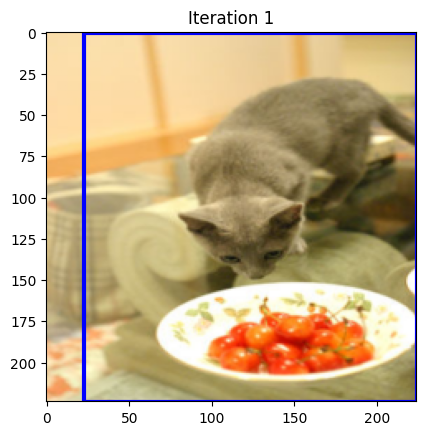

In [7]:
curr_class = random.choice(classes)
indices = np.random.choice(list(datasets_per_class_test[classe].keys()), size=5, replace=False)
agent = Agent_3alpha(curr_class, load=True, model_name=model_name)

print("Class: " + curr_class)
for index in indices:
    image, gt_boxes = extract(index, datasets_per_class_test[curr_class])
    agent.predict_image(image, plot=True)